In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(train_data,train_label),(test_data,test_label)=fashion_mnist.load_data()

In [6]:
train_data.shape,train_label.shape

((60000, 28, 28), (60000,))

In [7]:
x_train=train_data/255
x_test=test_data/255

In [8]:
y_train=tf.one_hot(train_label,depth=10)
y_train=tfds.as_numpy(y_train)

In [9]:
y_train.shape

(60000, 10)

In [10]:
y_test=tf.one_hot(test_label,depth=10)
y_test=tfds.as_numpy(y_test)

In [11]:
y_test.shape

(10000, 10)

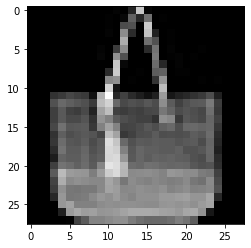

In [14]:
plt.imshow(x_train[35].reshape((28,28)),cmap='gray')

In [15]:
model=keras.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128,activation=tf.nn.relu))
model.add(Dense(units=10,activation=tf.nn.softmax))
model.compile(optimizer='adam',
             loss=keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,shuffle=True)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 270us/sample - loss: 1.6669 - accuracy: 0.8043
Epoch 2/5
60000/60000 [==============================] - 24s 407us/sample - loss: 1.6184 - accuracy: 0.8457
Epoch 3/5
60000/60000 [==============================] - 22s 373us/sample - loss: 1.6077 - accuracy: 0.8549
Epoch 4/5
60000/60000 [==============================] - 20s 329us/sample - loss: 1.6005 - accuracy: 0.8621
Epoch 5/5
60000/60000 [==============================] - 16s 272us/sample - loss: 1.5956 - accuracy: 0.8669


In [17]:
model.evaluate(x_train,y_train)

60000/60000 [==============================] - 6s 95us/sample - loss: 1.5916 - accuracy: 0.8709


[1.5916293314615886, 0.87091666]

In [37]:
class Mycallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('accuracy')>0.85):
            print('/n the accuracy has crossed 82% so terminating training ')
            self.model.stop_training=True


In [38]:
class Mycallback2(keras.callbacks.Callback):
    def on_epoch_start(self,epoch,logs={}):
        if (logs.get('accuracy')>0.70):
            print('/n the accuracy has crossed 70% so terminating training ')
            self.model.stop_training=True


In [39]:
callbacks=Mycallback()
callback2=Mycallback2()

In [40]:
model=keras.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128,activation=tf.nn.relu))
model.add(Dense(units=10,activation=tf.nn.softmax))
model.compile(optimizer='adam',
             loss=keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=8,shuffle=True,callbacks=[callbacks,callback2])

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 11s 179us/sample - loss: 1.7142 - accuracy: 0.7548
Epoch 2/8
60000/60000 [==============================] - 10s 166us/sample - loss: 1.6740 - accuracy: 0.7889
Epoch 3/8
60000/60000 [==============================] - 10s 165us/sample - loss: 1.6648 - accuracy: 0.7974
Epoch 4/8
60000/60000 [==============================] - 10s 173us/sample - loss: 1.6585 - accuracy: 0.8026
Epoch 5/8
60000/60000 [==============================] - 10s 164us/sample - loss: 1.6540 - accuracy: 0.8076
Epoch 6/8
60000/60000 [==============================] - 10s 174us/sample - loss: 1.6500 - accuracy: 0.8112
Epoch 7/8
60000/60000 [==============================] - 10s 164us/sample - loss: 1.6474 - accuracy: 0.8144
Epoch 8/8
60000/60000 [==============================] - 10s 163us/sample - loss: 1.6445 - accuracy: 0.8168


In [ ]:
model.fit(x_test,y_test)